# Project: AI-Generated Text Detection 🤖
--------------------------------

Can you predict the 'ind' (0= human, 1 = AI 🤖) as a function of the 768 document embeddings, the word count and the punctuation? Be careful - there is imbalanced data which may require some advanced methods in order to get a reasonable model. Can you beat a naive (majority class) model or logistic regression? Now is your time to shine and apply everything you learned.

F1 score: 0.52




In [ ]:
print('F1 Score:', f1_score(y_test, test_preds_voting))

##All Library Imports

In [ ]:
#EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#feature engineering
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
!pip install numpy scikit-learn imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

#functions for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

#classifier models: GBC, LR, Voting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

#classification metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

#permutation testing
from sklearn.inspection import permutation_importance

#partial dependence
!pip install pulp
!pip install pycebox
from pycebox.ice import ice, ice_plot

# to get rid of annoying future warnings...
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import gc

#to save the trained model and load the same model for testing
import joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3625 sha256=247fa1b1fbb33af2d1c6770a8aee3044f73f1db43df510a2872c4001cef1ada3
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


# Load Data
* Raw data was download from this website:
  * https://bitgrit.net/competition/19

In [ ]:
!gdown 1VrL4s1daaBJs_UCEddaxz8RFAVCYRowb

Downloading...
From: https://drive.google.com/uc?id=1VrL4s1daaBJs_UCEddaxz8RFAVCYRowb
To: /content/6e2834d6-96ff-4d56-b01f-5f343e65e516.xlsx
100% 15.3M/15.3M [00:00<00:00, 109MB/s] 


In [ ]:
import pandas as pd
# https://drive.google.com/file/d/1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas/view?usp=sharing
!gdown 1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas

Downloading...
From: https://drive.google.com/uc?id=1v4ih6bo-cHpWl9JB1iiMwJk_4gc_GKas
To: /content/ai-text-competition-data.zip
100% 50.8M/50.8M [00:00<00:00, 53.4MB/s]


In [ ]:
# unzip it
!unzip ai-text-competition-data.zip

# read it
df = pd.read_csv('/content/ai-text-competition/training_set.csv')

Archive:  ai-text-competition-data.zip
   creating: ai-text-competition/
  inflating: ai-text-competition/solution_format.csv  
  inflating: ai-text-competition/test_set.csv  
  inflating: ai-text-competition/training_set.csv  


In [ ]:
print(df.shape)
df.head()

(11144, 772)


,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


The original dataset shows that we have a total of 11,144 rows and 772 columns.


#Exploratory Data Analysis

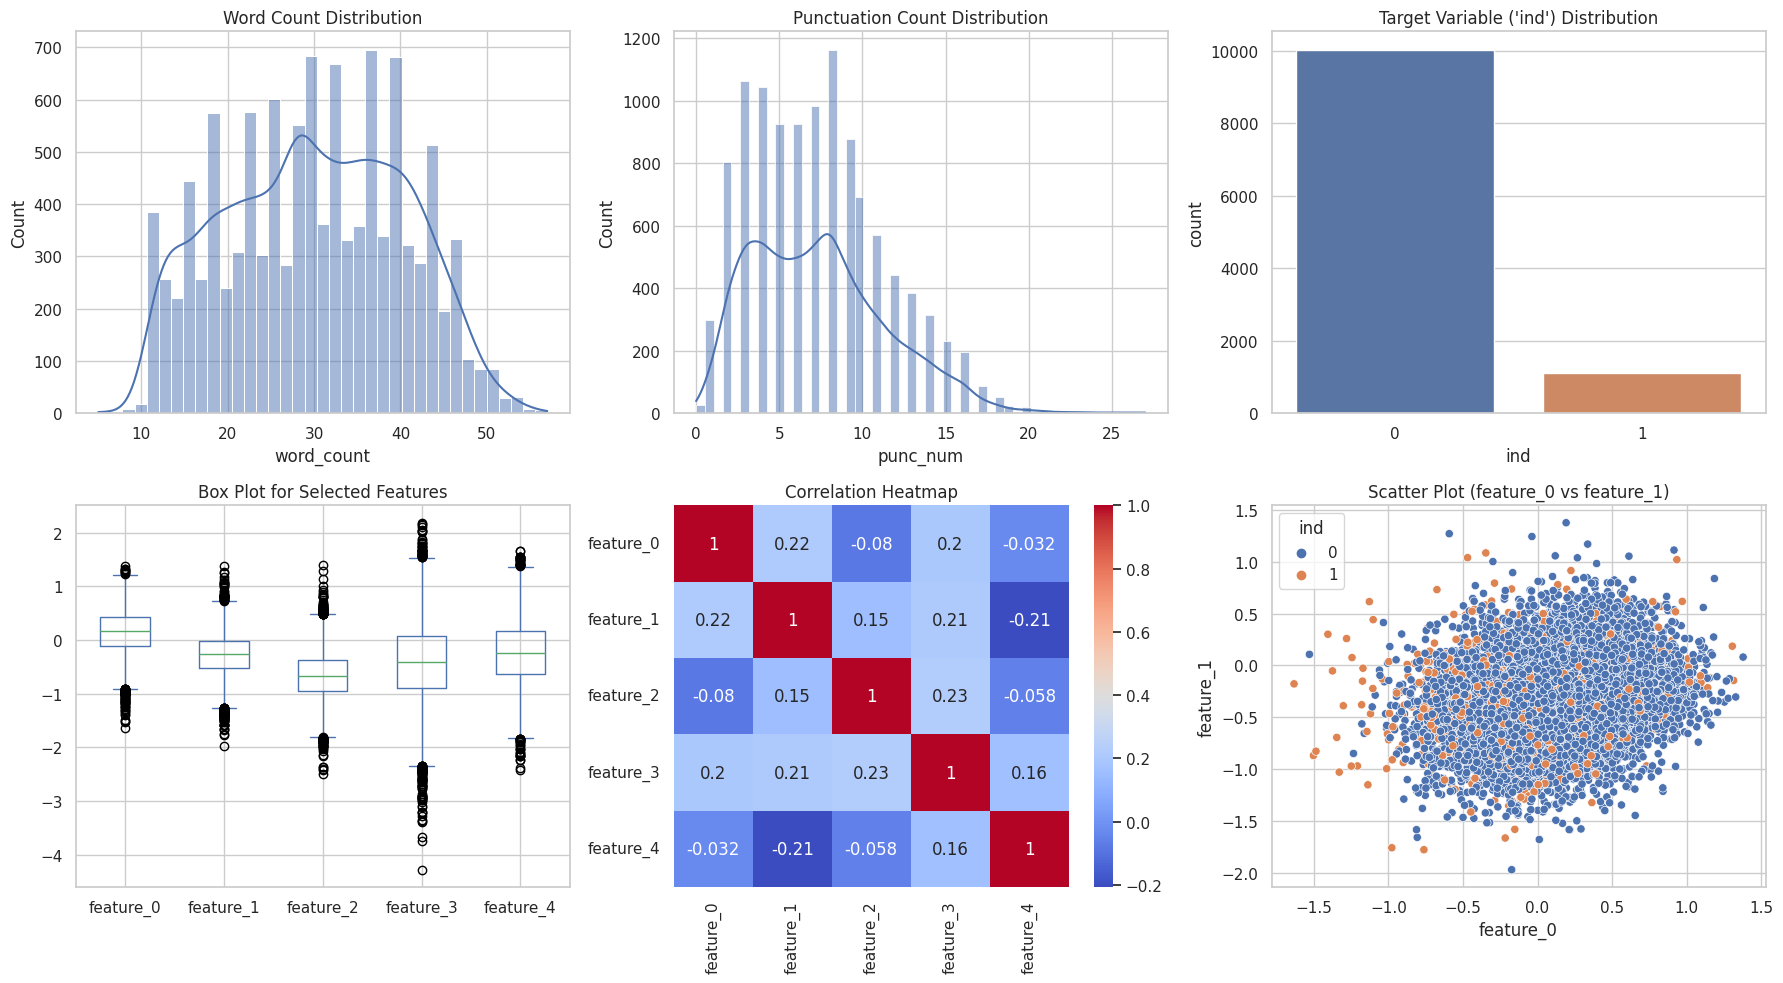

In [ ]:
import seaborn as sns
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histogram for Word Count
# This histogram shows the distribution of word counts in the documents.
# It helps understand how verbose the texts typically are.
sns.histplot(data=df, x="word_count", kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Word Count Distribution")

# Histogram for Punctuation Count
# Similar to the word count, this histogram gives insights into the punctuation usage across the documents.
sns.histplot(data=df, x="punc_num", kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Punctuation Count Distribution")

# Bar Chart for Target Variable Distribution
# The bar chart indicates the distribution of the target classes (0 for human, 1 for AI),
# highlighting the imbalance between the two.
sns.countplot(x='ind', data=df, ax=axes[0, 2])
axes[0, 2].set_title("Target Variable ('ind') Distribution")

# Box Plot for a Selection of Features
# This box plot for a selection of the document embedding features (feature_0 to feature_4)
# helps in identifying the range and presence of outliers in these features.
selected_features = ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4']
df[selected_features].plot(kind='box', ax=axes[1, 0])
axes[1, 0].set_title("Box Plot for Selected Features")

# Correlation Heatmap of Selected Features
# The heatmap shows the correlation between selected features,
# providing insights into any linear relationships.
corr = df[selected_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title("Correlation Heatmap")

# Scatter Plot for Two Features Against the Target Variable
# Choosing feature_0 and feature_1 as examples
# This scatter plot with hue based on the target variable ('ind')
# helps in visualizing the distribution and potential separability of classes based on these two features.
sns.scatterplot(x='feature_0', y='feature_1', hue='ind', data=df, ax=axes[1, 2])
axes[1, 2].set_title("Scatter Plot (feature_0 vs feature_1)")

# Adjust layout
plt.tight_layout()
plt.show()


##EDA Discussion

The Target Variable Distribution bar graph highlights that the dataset is imbalanced. It is clear that more 0 or human generated documents are representaed than 1 or 🤖 generated documents. Because of the imbalance:

* There may be biased predictions when training the model and;
* The accuracy could overlook the minority class as it is under represented in the dataset.

Because of the clear imbalance we decided to undersample the majority class because it would help balance the data.

Additionally, we see that there is negative correlation relationship in the darker blue boxes of the correlation heatmap.

We can also see that the Word Count histogram has a rough left skewed distribution and the Punctuation Number histogram has a right skewed distribution.

The box plot gives us an idea of what the range of values look like in a sample of the data. We can see that feature_3 has the widest range of values and more outliers, while the other 4 boxplot range of values are somewhat similar

#Data Prep

ID variables should be dropped from the dataset because they are not valuable or insightful to the predictive modeling process.

In [ ]:
#drop ID column
df.drop('ID', axis=1, inplace=True)
df.shape

(11144, 771)

In [ ]:
#checking for missing values
df.isna().sum()

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
              ..
feature_766    0
feature_767    0
word_count     0
punc_num       0
ind            0
Length: 771, dtype: int64

No missing values so no need to drop NA values

In [ ]:
df['ind'].value_counts()

0    10044
1     1100
Name: ind, dtype: int64

We can see that in the target variable there are much more instances that indicate the document is text is human-generated (Class 0). Out of the total 11,114 values, there 10,044 values in Class 0  and 1,100 values in Class 1 (AI-generated).

##Split into X, Y, Train, & Test

To separate the predictors variables from the target variable, the `ind` column is assigned to `y` and the rest of the columns will be assigned to `x` by dropping `ind`

In [ ]:
#defining y target variable
y = df['ind']

#defining x predictor variables
X = df.drop('ind', axis=1)
print("Original X shape:", X.shape)
print("Original y shape:", y.shape)

Original X shape: (11144, 770)
Original y shape: (11144,)


In [ ]:
np.random.seed(42) #setting the seed for reproducibility

#split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1, #test size 10/90 split
                                                    random_state=42) #setting seed to 42 in order to split the same way and evaluate the same dataset

#converting earch partition into arrays and scaling the data to prevent data leakage
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#ensuring the test set is 10% of the dataset and used as a reference to make sure
#the test set stays the same throughout the modeling process
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (10029, 770)
Testing set shape: (1115, 770)


After splitting the data, we can see that the training set has 10,029 rows and 770 columns and the testing set has 1,115 rows and 770 columns. To prevent data leakage, row values should be referenced to ensure the class imbalance amount stays consistent through the rest of the process.

##Undersampling

Based on the Target Variable ('ind') Distribution graph in the EDA section and the value_counts function of the target variable, we can clearly see there is a large imbalance between Class 0 and Class 1. In order to reduce the tendency of the model making biased predictions and generating flawed accuracy scores, we decided to undersample the majority class (Class 0) as a random sampling technique on the training set.

In [ ]:
#we want to see what the distribution of the classes in the target variable look like on the training set
#filtering training set on just 0s
zero_train_df = X_train[y_train == 0]
print("Training Set - Class '0' Shape:", zero_train_df.shape)

#filter training set on just 1s
one_train_df = X_train[y_train == 1]
print("Training Set - Class '1' Shape:", one_train_df.shape)

Training Set - Class '0' Shape: (9034, 770)
Training Set - Class '1' Shape: (995, 770)


In [ ]:
# Under-sample the majority class
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

#count the values each class of the target variable
print(Counter(y_train_resampled))

Counter({0: 995, 1: 995})


In [ ]:
# Under-sample the majority class
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)
print(Counter(y_train_resampled))

Counter({0: 995, 1: 995})


Before undersampling, we can see there was 9,034 values in Class 0 and 995 in Class 1. Now the result of undersampling the majority class creates a balanced set of 995 instances of human-generated texts and 995 instances of AI-generated texts.

Now that we have applied different techniques to the training set in order to improve the model performance of the test set, we can start defining the classification models.

#Modeling

At first, we were only working with a Gradient Boosting Classifier as this model is know for generally performing better than a Decision Tree or Random Forest. However the raw F1 score of just the GBC model was 0.44. This was not good enough so we looked at alternative models that good potentially work better such as ADA Boost, Logistic Regression, and Support Vector Classifier. The ADA Boosting Classifier and Random Forest Classifier were not too promising as it created an f1 score that was less.  

With some hyperparameter tuning on the Logistic Regression, it produced similar results to the GBC model. Therefore with some research, the Voting Classifier was chosen as an ensemble learning method to boost our f1 score through the combination of our 2 strongest performing models.

##Gradient Boosting Classifier

In [ ]:
# Fit a Gradient Boosting Classifier
GBC = GradientBoostingClassifier(learning_rate=0.19,
                                       loss='exponential',
                                       n_estimators=600,
                                       max_depth=4,
                                       random_state=42)
GBC.fit(X_train_resampled, y_train_resampled)

# Save the fitting model results and load the predictions so that the f1 score results stay consist whenever we run it
joblib.dump(GBC, 'gbc_model.pkl')
GBC = joblib.load('gbc_model.pkl')

# Make predictions on the test set
test_preds_GBC = GBC.predict(X_test)

# Evaluate the model
print("F1 Test Score:", f1_score(y_test, test_preds_GBC))

F1 Test Score: 0.45945945945945943


The GBC model produces an F1 score of 0.47.

We used the default parameters as a baseline to do hyperparameter tuning with.

These are some observations found after playing around with the parameters:
* `learning_rate=0.19`: learning rate of 1.9%
  * Tuning this parameter in alliance with the n_estimators tended to help boost the f1 score more heavily.

* `loss='exponential`: exponential as the loss function to be optimized
* `n_estimators=290`: 290 for the number of boosting stages
  * By playing around with this parameter, we found that the mosre estimators you add, the longer it takes the model to run (about 4 minutes). This makes sense because it has more boosting stage and over 700 columns to iterate through.
*  `max_depth=4`: using 4 as the maximum depth of individual trees
  * increasing this slightly from 3 to also seemed to weigh heavily on boosting the f1 score. This could be because the tree can pick up more patterns in the training set.
  * this also pairs well with the number of estimators
* `random_state=42`

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0,
                        penalty='l2',
                        solver='liblinear',
                        max_iter=100,
                        random_state=42)

LR.fit(X_train_resampled, y_train_resampled)

# Save the fitting model results and load the predictions so that the f1 score results stay consist whenever we run it
joblib.dump(LR, 'lr_model.pkl')
LR = joblib.load('lr_model.pkl')

# Make predictions on the test set
test_preds_LR = LR.predict(X_test)

# Evaluate the model
print("F1 Test Score:", f1_score(y_test, test_preds_LR))

F1 Test Score: 0.462809917355372


The LR model produces an F1 score of 0.46.

We used the default parameters as a baseline to do hyperparameter tuning with. These are some observations found after playing around with the parameters:
* `C=0.5`: regularization strength
  * The default was 1.0 but decreasing this to 0.5 helped with objective of a maximized f1 score. This parameter overall helps controls fitting the training data and preventing overfitting
* `penalty='l1'`: L1 regularization (lasso) penalty
  * l2 was the default but changing this to l1 helped with our objective
*  `solver='saga`:  saga optimization algorithm for fitting the LR model
  * this paired well with the penalty parameter. It supported both L1 and L2 regularization but maximized the f1 score better with L1.
*`max_iter=100`

  * this parameter did not have a strong impact on the f1 score when decreasing or increasing the maximum number of iterations. Therefore this parameter was not a main focus when hyperparameter tuning
* `random_state=42`

##Voting Classifier

In [ ]:
# Define the Voting Classifier
voting_classifier = VotingClassifier(estimators=[('lr', LR), ('gbc', GBC)],
                                     voting='hard')

# Fit the Voting Classifier on the resampled training data
voting_classifier.fit(X_train_resampled, y_train_resampled)


# Save the fitting model results and load the predictions so that the f1 score results stay consist whenever we run it
joblib.dump(voting_classifier, 'voting_clf.pkl')
voting_classifier = joblib.load('voting_clf.pkl')

# Make predictions on the test set
test_preds_voting = voting_classifier.predict(X_test)
train_preds_voting = voting_classifier.predict(X_train_resampled)

# Evaluate the Voting Classifier
f1_voting = f1_score(y_test, test_preds_voting)
print("F1 Test Score (Voting Classifier):", f1_voting)

F1 Test Score (Voting Classifier): 0.5220338983050847


The final F1 score is 0.529 by using the Voting Classifier boosted by about 0.07 from the individual models. We used te LR and GBC models as estimors because had some of the strongest f1 scores out of the all the models we tested and played around with. Except SVC also had a high f1 score, but we wanted to prioritize model interpretability for the permuation importance and partial dependence process. We also used a hard voting parameter because it performed better than soft voting and it takes the majority from the individual classifier class votes.

#Evaluation

##Classification Report

In [ ]:
#train partition report
train_c_report = classification_report(y_train_resampled, train_preds_voting)
print("Classification Report (Train):\n", train_c_report)

#test partition report
test_c_report = classification_report(y_test, test_preds_voting)
print("\nClassification Report (Test):\n", test_c_report)

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       995
           1       1.00      0.89      0.94       995

    accuracy                           0.94      1990
   macro avg       0.95      0.94      0.94      1990
weighted avg       0.95      0.94      0.94      1990


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      1010
           1       0.41      0.73      0.53       105

    accuracy                           0.88      1115
   macro avg       0.69      0.81      0.73      1115
weighted avg       0.92      0.88      0.89      1115



*Training Partition*
* Precision: The model's accuracy in predicting positive instances. For both classes 0 and 1, the precision is high (0.89 and 1.00), indicating that when the model predicts Class 0, it is correct 89% of the time in the undersampled training set after reduced dimensionality. And the model predicts Class 1 correctly 100% of the time in te undersampled training set after reduced dimensionality.

* Recall: Measures the model's ability to correctly identify all actual positives.
  The recall is also high (1.00 for Class 0 and 0.89 for Class 1), suggesting the model is good at equally detecting the both instances.

* F1 Score: Combines the precision and recall, providing a single score that balances both concerns.
  The F1-score is 0.97 for both classes, which is excellent and indicates a well-balanced model between precision and recall.

*Test Partition*
* Precision: There's a drop in precision for the test set (0.97 for Class 0 and 0.42 for Class 1), which is expected as models typically perform better on the data they were trained on than on new data. The precision could be significantly lower on Class 1 because there are much less instances of Class 1 so it is harder to pick up patterns with less data.

* Recall: There is also a decrease in recall (0.89 for Class 0 and 0.74 for Class 1), indicating that the model is missing more positive instances than in the training set. But more specifically

* F1 Score: This decrease in precision and recall is reflected in the F1-scores (0.93 for Class 0 and 0.54 for Class 1). Again due to the imbalance

##Confusion Matrix

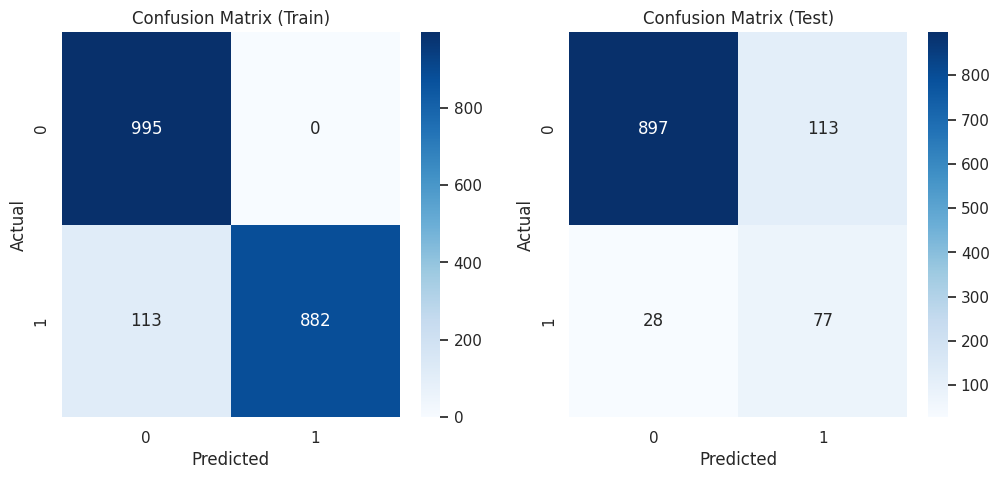

In [ ]:
#train partition confusion matrix
cm_train = confusion_matrix(y_train_resampled, train_preds_voting)

#test partition confusion matrix
cm_test = confusion_matrix(y_test, test_preds_voting)


#plotting the confusion matrices side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix (Train)')
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix (Test)')
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted')

plt.show()

Training Set:


1. TN: 995 instances that are part of Class 0 were correctly predicted as Class 0 by the model
2. FP: 0 instances that are part of Class 0 were incorrectly predicted as Class 1
3. FN: 53 instances that are part of Class 1 were incorrectly predicted as Class 0
4. TP: 942 instances that belong to Class 1 were correctly predicted as Class 1

Testing Set:

1. TN: 902 instances that are part of Class 0 were correctly predicted as Class 0 by the model
2. FP: 108 instances that are part of Class 0 were incorrectly predicted as Class 1.
There is a struggle here for the model to correctly identify Class 1 instances
3. FN: 27 instances that are part of Class 1 were incorrectly predicted as Class 0
4. TP: 78 instances that belong to Class 1 were correctly predicted as Class 1

## GBC Permutation Importance

### Top 15

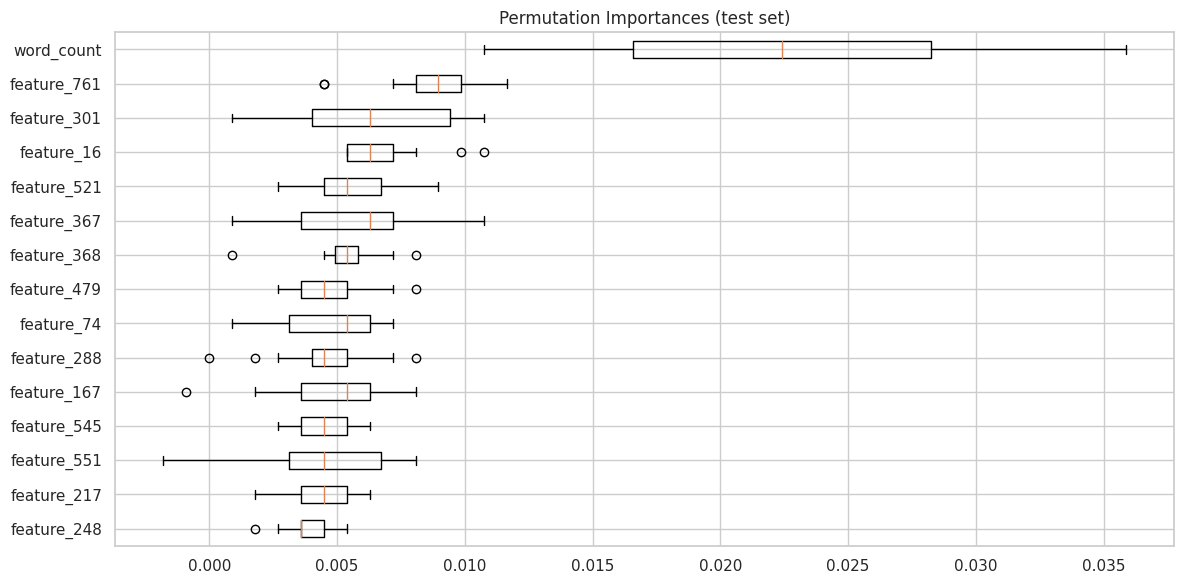

In [ ]:
# Calculate permutation importance
result = permutation_importance(GBC, X_test, y_test, n_repeats=15, random_state=42)

# Sort the features according to their importance
perm_sorted_idx = result.importances_mean.argsort()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Extract feature names from the DataFrame for the top 15 features
feature_names = X.columns
labels = feature_names[perm_sorted_idx][-15:]

# Only show the top 15 features
ax1.boxplot(result.importances[perm_sorted_idx][-15:].T, vert=False, labels=labels)

ax1.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In the GBC model, we can see that word_count, feature_761, and feature_301 are the top 3 features here.

## LR Permutation Importance

### Top 15

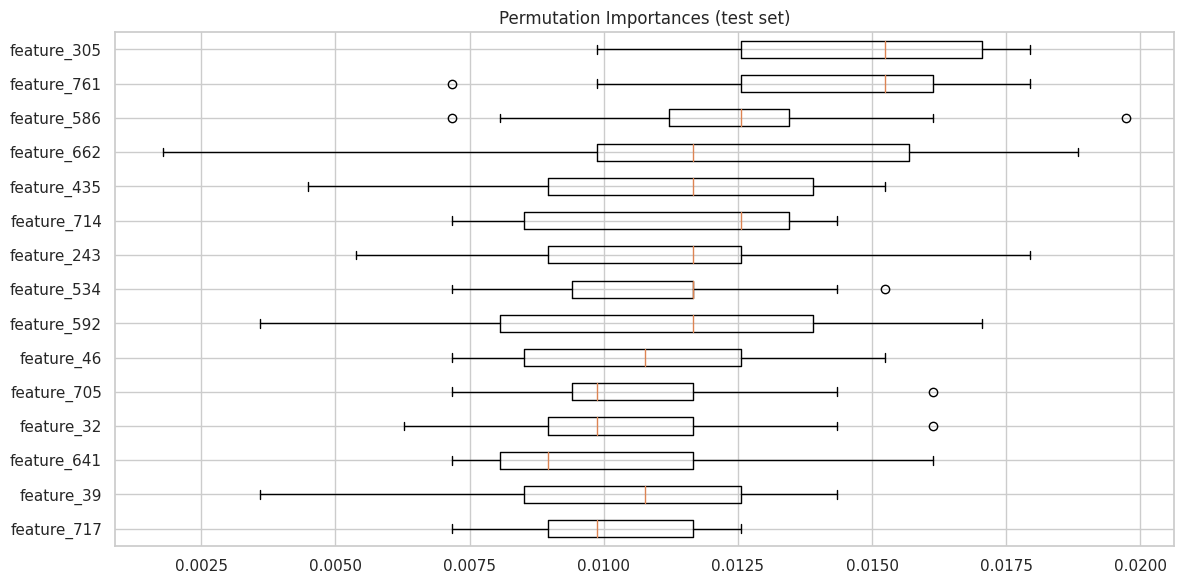

In [ ]:
# Calculate permutation importance
result = permutation_importance(LR, X_test, y_test, n_repeats=15, random_state=42)

# Sort the features according to their importance
perm_sorted_idx = result.importances_mean.argsort()

# Plot the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Extract feature names from the DataFrame for the top 15 features
feature_names = X.columns
labels = feature_names[perm_sorted_idx][-15:]

# Only show the top 15 features
ax1.boxplot(result.importances[perm_sorted_idx][-15:].T, vert=False, labels=labels)

ax1.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In the LR model, we can that word_count, feature_305, feature_761 are the most important features

## VC Permutation Importance

### Top 15

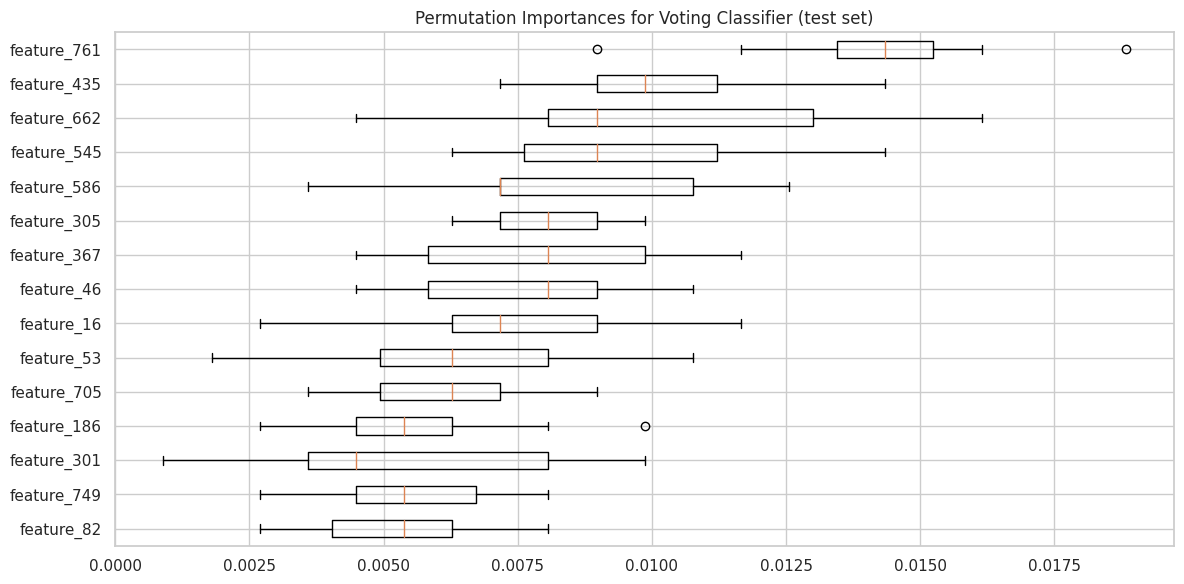

In [ ]:
# Perform permutation importance
result_vc = permutation_importance(voting_classifier, X_test, y_test, n_repeats=15, random_state=42)

# Sort the features according to their importance
perm_sorted_idx_vc = result_vc.importances_mean.argsort()

# Plot the results for the Voting Classifier
fig, ax1 = plt.subplots(figsize=(12, 6))

# Extract feature names from the DataFrame for the top 15 features
feature_names = X.columns
labels_vc = feature_names[perm_sorted_idx_vc][-15:]

# Only show the top 15 features for the Voting Classifier
ax1.boxplot(result_vc.importances[perm_sorted_idx_vc][-15:].T, vert=False, labels=labels_vc)

ax1.set_title("Permutation Importances for Voting Classifier (test set)")
fig.tight_layout()
plt.show()

We can see that feature_761, feature_435, and feature_662 are the most important predictors because they have the highest importance values. This means if we shuffle these columns, it will break the model which shows feature importance.

##Partial Independence

###feature_761

In [ ]:
train_X_df = pd.DataFrame(X_train_resampled, columns=X.columns)

tmpdf = ice(data=train_X_df,
            column='feature_761',
                   predict=voting_classifier.predict,
                      num_grid_points=10)

print(np.shape(tmpdf))

(10, 10029)


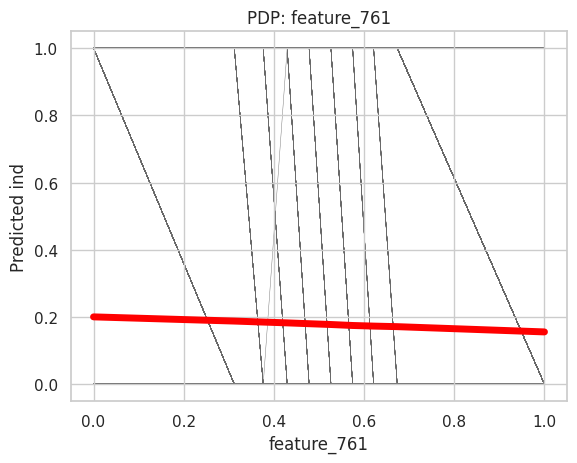

In [ ]:
ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: feature_761')
plt.ylabel('Predicted ind')
plt.xlabel('feature_761');
plt.show()

Based on the partial dependence plot for the `ind` column, the average ice curve shows that when `feature_761` is 0, the `ind` is about 0.22. This means that since the y value is closer to 0 would likely predict that instance as a Class 0 human-generated text. Or in other words that there is a 22% probability that it will be Class 1 AI-generated which is low.

###feature_435

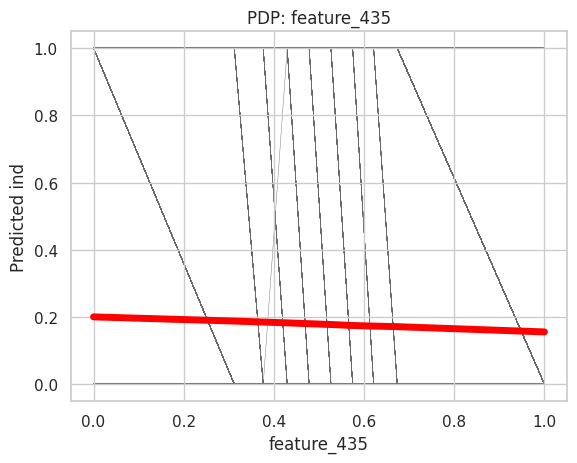

In [ ]:
tmpdf = ice(data=train_X_df,
            column='feature_435',
              predict=voting_classifier.predict,
                num_grid_points=10)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: feature_435')
plt.ylabel('Predicted ind')
plt.xlabel('feature_435');
plt.show()

Based on the partial dependence plot for the `ind` column, the average ice curve shows that when `feature_435` is 0, the `ind` is about 0.21. This means that since the y value is closer to 0 would likely predict that instance as a Class 0 human-generated text. Or in other words that there is a 21% probability that it will be Class 1 AI-generated which is low.

###feature_662

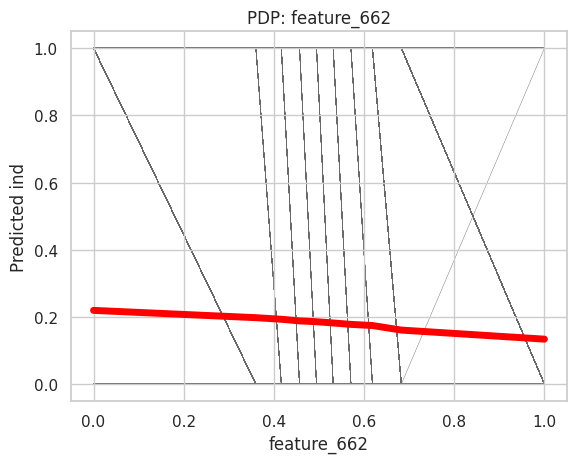

In [ ]:
tmpdf = ice(data=train_X_df,
            column='feature_662',
                   predict=voting_classifier.predict,
                    num_grid_points=10)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: feature_662')
plt.ylabel('Predicted ind')
plt.xlabel('feature_662');
plt.show()

Based on the partial dependence plot for the `ind` column, the average ice curve shows that when `feature_462` is 0, the `ind` is about 0.23. This means that since the y value is closer to 0 would likely predict that instance as a Class 0 human-generated text. Or in other words that there is a 23% probability that it will be Class 1 AI-generated which is low.
All of these are similar

#Conclusions

##Successes/Strengths


1.   Exploring the data allowed us to understand the dataset. Through our exploratary process we found that the dataset was imbalanced. This provided a clue into the model and processes we ended up using in undersampling and gradient boosting.

  This step likely improved model performance, when compared to the other models available, because it ensured that the model was addressed the class imbalance on the training set, which can significantly impact model accuracy.

2.   The use of a Gradient Boosting Classifier (GBC) resulted in good baseline precision, recall, and F1 scores on the training data, indicating the model's predictive capability on the data it was trained on. The higher F1 score on individual based models suggested a well-balanced model between precision and recall, but one that was needed in assistance with other models to reach a higher f_1 scores.

3. As a team, we were able to review each other's work/process to refine the model work above. As a result of our discussions, we decided to get creative in changing the our approach. We ultimatley decided that feeding our model into another model/process would boos the f_1 score. While we would like to aim for a giher f_1 score, our model runs through out and is a sound baseline to continue to develop. We don't take the grading or review process lightly. We believe there needs to be a balance between creativity, sound datascience, and programing. Which is why are comfortable in submitting this receipe even though our f_1 scores could be higher.  


##Failures/Obstacles


1.   The drop in precision, recall, and F1 score on the test set suggests that the model did not generalize as well to unseen data. This is a common challenge and indicates a possible overfitting to the training data or a need for more general features to improve the model's predictive power on new data.

2.   The model relies on raw features without clear indications of feature engineering or selection. There might be a failure to capture more complex relationships or interactions between features that could improve model performance.

3. We ran into an issue regarding the f_1 output. We were having trouble recreating the same f_1 score. In order to address this we reached out for guidance and found we needed sample seed, but more importantly, that our model had data leakage. To address the inconsistent f1 score we also used the jobib library to save the model results and load them for predictions

4. The Data leakage issue was a thorn in our side as we weren't sure where this issue was occuring. We were able to fix it by only working on the training set and not the test set and reviewing the materials presented in lecture.

5. Having fixed this issue, we ran into the problem that our model was producing low f_1 scores. In order to address this, we became creative, as described above. We were able to feed our model into another to boost scores.



##Why Our Model Performs the Way It Does


1.   The model's initial high performance metrics could be attributed to data leakage, and handling of class imbalance through undersampling and possibly due to the high dimensionality of the feature space, which gradient boosting methods typically handle well.

  Gradient boosting constructs an additive model in a forward stage-wise fashion, allowing for optimization on differentiable loss functions, which can lead to good performance on complex datasets. However, after review and much discussion, we found that the dataset was not split properly. Once we solved this issue, f_1 scores droped significantly.

2. In an effort to increase the f_1 scores we included PCA analusis, see discussion why above.

3.   The tuning of hyperparameters such as learning rate, loss function, and the number of estimators plays a crucial role in the performance of gradient boosting models.


#Appendix

PCA & Undersampling Pipeline: https://colab.research.google.com/drive/13BSVKwU-Pk8eB5-_F9HsHfwG7L5N4upB#scrollTo=eAxXmvLnOqx3&uniqifier=1
* This notebook runs faster as we experimented with dimension reduction using principal components analysis as a feature engineering technique. It also produced an F1 score of 0.54